# __Support Vector Machine - SVM__
---
En esta demostración haremos uso de una SVM para construir y entrenar un modelo usando ejemplos proporcionados por humanos
y ejemplos para ya sea predecir que ejemplos son malignos o benignos.


Haremos uso de un dataset llamado __Cancer.csv__ del repositorio de [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29).


En el dataset definiremos el valor y estado de cáncer se la siguiente forma.
- Class 2 = mild state
- Class 4 = evil state

## __¿Cómo usar una SVM?__

Las SVM son usadas como técnicas de clasificación las cuales primero buscan encontrar el hiperplano que puede separar objetos de diferentes clases y entonces deja un máximo margen de puntos anidados de cada clase para la separación del hiperplano.

## __Importando librerías__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## __Cargamos el dataset__

Lo primero que haremos será cargar el [dataset](./dataset/cancer.csv) que hemos descargado anteriormente y listamos los datos de las primeras 5 filas.

In [2]:
df = pd.read_csv("./dataset/cancer.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Cantidad de filas y columnas

df.shape

(699, 11)

In [4]:
# Cantidad de celdas(Filas X Columnas)

df.size

7689

In [5]:
# Cantidad de datos por columna y tipos de dato

df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [7]:
# Valores repetidos o ejemplos por columna

df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [8]:
# Declaramos las etiquetas

benign = df[df['Class'] == 2] # Extraemos cantidad de datos iguales a 2 en la columna Class
malignant = df[df['Class'] == 4] # Extraemos la cantidad de datos iguales a 4 en la columna Class

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

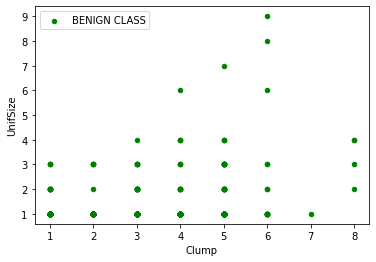

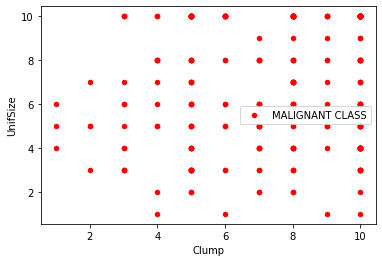

In [9]:
# Colocamos las etiquetas en un gráfico por separado

benign.plot(kind='scatter', x="Clump", y="UnifSize", color='green', label="BENIGN CLASS")
malignant.plot(kind='scatter', x="Clump", y="UnifSize", color='red', label="MALIGNANT CLASS")

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

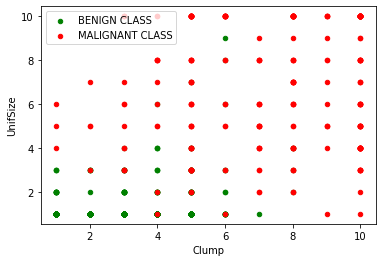

In [12]:
# Unimos ambas gráficas

axes = benign.plot(kind='scatter', x="Clump", y="UnifSize", color='green', label="BENIGN CLASS")
malignant.plot(kind='scatter', x="Clump", y="UnifSize", color='red', label="MALIGNANT CLASS", ax=axes)

In [13]:
# Mostramos los nuevos tipos de datos que se formaron

df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [17]:
# Convertimos los tipos de datos no numéricos en enteros

df = df[pd.to_numeric(df["BareNuc"], errors="coerce").notnull()]
df["BareNuc"] = df["BareNuc"].astype("int64")

df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [18]:
# Revisamos las columnas actuales

df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [19]:
# Quitamos la columna que no queremo(Class)

feature = df[
    [
        'Clump',    'UnifSize',     'UnifShape',    'MargAdh',  'SingEpiSize',
        'BareNuc',  'BlandChrom',   'NormNucl',     'Mit'
    ]
]

In [20]:
# Creamos variables dependientes e independientes

x = np.asarray(feature)         # X es independiente
y = np.asarray(df["Class"])     # y es dependiente

x

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [23]:
# Entrenamos nuestra nueva data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=2
)

# Mostramos la cantidad de filas y columnas por variable

# 546 datos son usados para entrenamiento
print(x_train.shape)
print(y_train.shape)

# 137 datos son usados para prueba
print(x_test.shape)
print(y_test.shape)

# Hemos declarado un 0.2(20%) como tamaño de prueba

(546, 9)
(546,)
(137, 9)
(137,)


In [25]:
# Creamos la Support Vector Machine(SVM)
# Hacemos uso de un SVC(Support Vector Classifier)

from sklearn import svm

model = svm.SVC(
    kernel='linear',    # Kernel son las clases de algoritmos para patrones de análisis
    gamma="auto",       # Parámetros Gamma determina la distancia a la que una sola muestra de datos ejerce influencia o se ajusta a la curvatura del límite de decisión
    C=0.3               # C determina la penalización o cuántas muestras se pueden colocar en diferentes clases
)

In [26]:
model.fit(x_train, y_train)

SVC(C=0.3, gamma='auto', kernel='linear')

In [29]:
y_predicted = model.predict(x_test)

In [ ]:
# Identificamos la diferencia entre la data actual en (x_test) y la predecida en (y_predicted)

In [30]:
# Evaluamos el resultado y revisamos la precisión y F1

from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

# Aquí podemos ver que la precisión es
# 99% estado leve
# 93% mal estado

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        83
           4       0.93      0.98      0.95        54

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



In [ ]:
# Hacemos que el sistema calcule la precisión
# precision = (True positive) / (True positive + Flase positive)ç
# O precision = (true)/Total
# F1 es armónico, es decir que es
# F1 score = 2 * (precision * recall) / (precision + recall)
# y support significa instancia

# Aquí se muestra que Class 2 es positivo y Class 4 es negativo
# Aquí 137 es 83 + 54 que es el resultado del dataset